In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.cluster import DBSCAN
import hdbscan
from sklearn.preprocessing import normalize, StandardScaler


import seaborn as sns

%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha': 0.5, 's': 80, 'linewidths': 0}

In [2]:
X = pd.read_csv('Mall_Customers.csv')
X.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = X.iloc[:,[3,4]].values

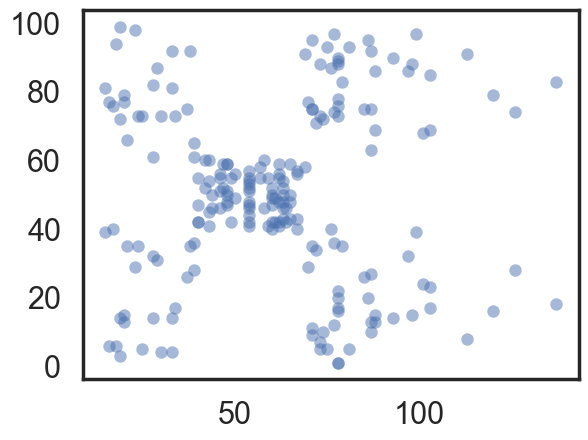

In [4]:
plt.scatter(X[:,0], X[:,1], color='b', **plot_kwds)

In [5]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=9, gen_min_span_tree=True)
clusterer.fit(X)


HDBSCAN(gen_min_span_tree=True, min_cluster_size=9)

<AxesSubplot: >

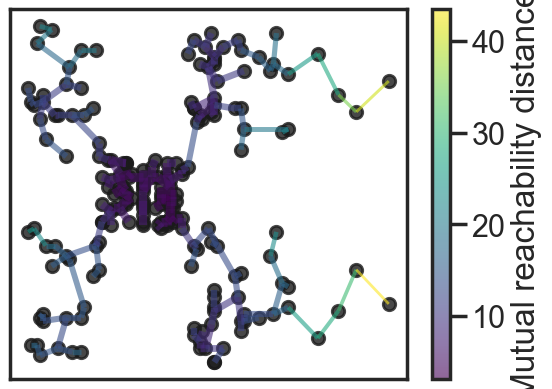

In [6]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)



<AxesSubplot: ylabel='$\\lambda$ value'>

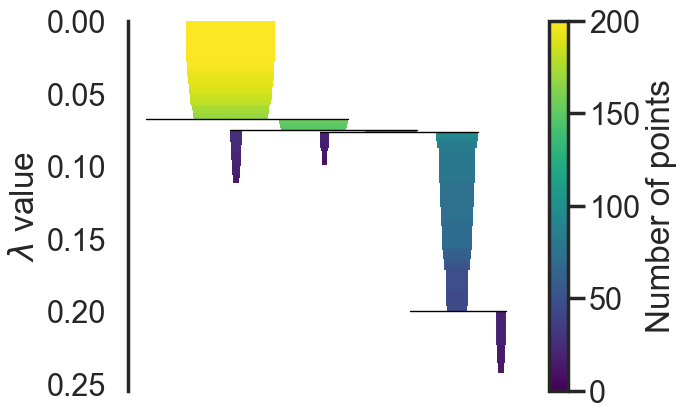

In [7]:
clusterer.condensed_tree_.plot()

<AxesSubplot: ylabel='$\\lambda$ value'>

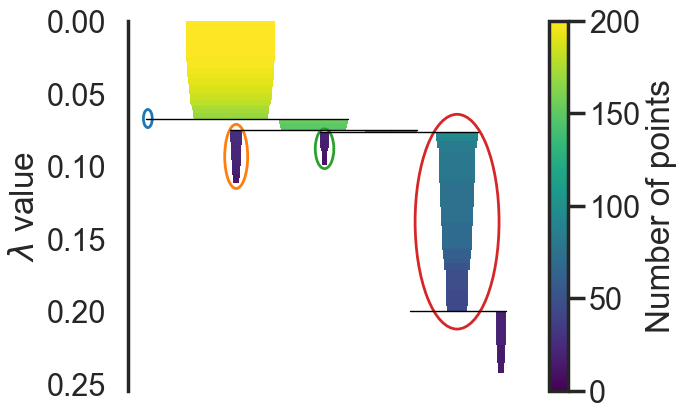

In [8]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

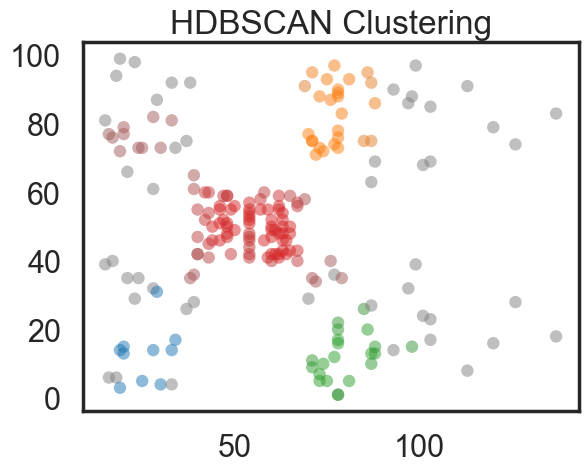

In [9]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(X.T[0], X.T[1], c=cluster_colors, **plot_kwds)
plt.title("HDBSCAN Clustering")
plt.show()